In [1]:
import numpy as np
import matplotlib.pyplot as plt

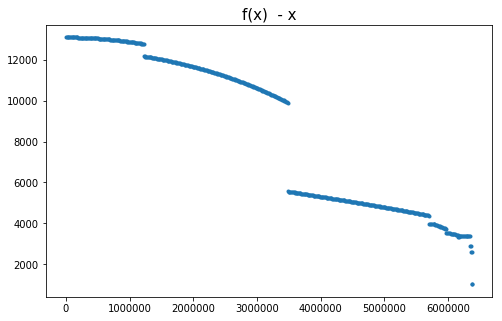

In [2]:
data = np.loadtxt("/home/catalina/Desktop/Programas/PREM500") # Carga el archivo como un arreglo de numeros

radius_list=[data[i-1:i,0:1][0][0] for i in range(1,len(data)+1)]
density_list =[data[i-1:i,1:2][0][0] for i in range(1,len(data)+1)] #Esto es porque el código trabaja con listas
### data[fila_i:fila_j,columna_i:columna_j] 

fig=plt.figure(figsize=(8,5))
ax=plt.axes()
plt.title("f(x)  - x", fontsize=15)
ax.plot(radius_list,density_list,'.')
plt.show()

In [3]:
#El error de evaluar la derivada en los bordes es siempre mayor que en el interior estricto del intervalo
#siempre se va a considerar que el punto en el que se está evalueando es x_0

def dfdx(x_list,y_list,x):
    
        if  (x==x_list[0]): #Si el punto a derivar es el borde izquierdo
            
            x0 = x_list[0]
            y0 = y_list[0]
            
            x1 = x_list[1]
            y1 = y_list[1]
            
            x2 = x_list[2]
            y2 = y_list[2]
            
            xj = x0

        elif(x==x_list[len(x_list)-1]): #Si el punto a derivar es el borde derecho
            x0 = x_list[len(x_list)-1]
            y0 = y_list[len(y_list)-1]
            
            x1 = x_list[len(x_list)-2]
            y1 = y_list[len(y_list)-1]
            
            x2 = x_list[len(x_list)-3]
            y2 = y_list[len(y_list)-1] 
            xj = x0
            
        else:
            i=x_list.index(x)  #Esto es para ubicar la posicion del x en x_list y poder usar sus dos puntos contiguos
            x0 = x_list[i]
            y0 = y_list[i]
             
            x1 = x_list[i-1]
            y1 = y_list[i-1]
             
            x2 = x_list[i+1]
            y2 = y_list[i+1]
             
            xj = x0
             
        dL0dx = (2*xj-x1 -x2)/((x0-x1)*(x0-x2))
        dL1dx = (2*xj-x0-x2)/((x1-x0)*(x1-x2))
        dL2dx = (2*xj-x0-x1)/((x2-x0)*(x2-x1))
        
        return dL0dx*y0 + dL1dx*y1 + dL2dx*y2

In [4]:
#Correción de la división por cero

dfdx_list = []
radius_list2 = []
for i in range(len(radius_list)-1):
   
    if(radius_list[i]==radius_list[i+1] or radius_list[i-1]==radius_list[i]):
        continue
    else:
        dfdx_list.append(dfdx(radius_list,density_list,radius_list[i]))
        radius_list2.append(radius_list[i])


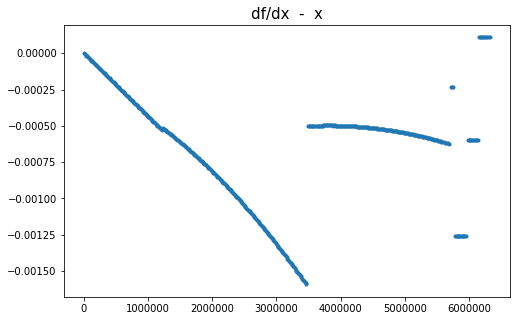

In [5]:
fig=plt.figure(figsize=(8,5))
ax=plt.axes()
plt.title("df/dx  -  x", fontsize=15)
ax.plot(radius_list2,dfdx_list,'.')
plt.show()